In [1]:
!pip install xlrd
!pip install numpy
!pip install tabulate
!pip install datetime 
!pip install networkx
!pip install matplotlib
!pip install folium

# import Cellyzer

In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import cellyzer as cz

# read message data csv file

In [3]:
msg_file_path = "demo_datasets/test_data/messages.csv"
messageDataSet = cz.read_msg(msg_file_path)

[x]  Reading Message Data...
[x]  Objects creation successful



         direction: 2 record(s) with incomplete values
         length: 2 record(s) with incomplete values
         timestamp: 2 record(s) with incomplete values


# print data set

In [4]:
cz.utils.print_dataset(messageDataSet, name="Message Dataset")


 >>> Message Dataset :
+------------+-------------+------------+---------+--------------------------------+
|   _user    | _other_user | _direction | _length |           _timestamp           |
+------------+-------------+------------+---------+--------------------------------+
| 8d27cf2694 | 78c4ca6671  |  Incoming  |   28    | Wed Sep 15 19:01:54 +0100 2010 |
| 329233d117 | 0041628436  |  Incoming  |    7    | Mon Feb 11 07:08:49 +0000 1980 |
| 329233d117 | 0041628436  |  Outgoing  |    6    | Mon Feb 11 07:14:05 +0000 1980 |
| 329233d117 | bac412f897  |  Outgoing  |   41    | Thu Sep 09 21:43:44 +0100 2010 |
| bac412f897 | 322692e582  |  Outgoing  |   75    | Mon Jan 07 22:58:28 +0000 1980 |
| bac412f897 | 322692e582  |  Incoming  |   33    | Thu Sep 09 18:53:25 +0100 2010 |
| bac412f897 | 322692e582  |  Outgoing  |   90    | Thu Sep 09 18:59:35 +0100 2010 |
| bac412f897 | 322692e582  |  Incoming  |   30    | Thu Sep 09 19:06:06 +0100 2010 |
| bac412f897 | 322692e582  |  Outgoing  |

# get all users

In [5]:
all_users = messageDataSet.get_all_users()
print("All Users : %s \n" % all_users)

All Users : ['8d27cf2694', '78c4ca6671', '329233d117', '0041628436', 'bac412f897', '322692e582', 'e1ba3ba266', 'ae578bf678', '30b785e895'] 



In [6]:
search_user1 = "0041628436"
search_user2 = "329233d117"

# get all connected users of a specific user

In [7]:
connected_users = messageDataSet.get_connected_users(search_user1)
print("Users connected to %s : %s \n" % (search_user1, connected_users))

Users connected to 0041628436 : ['329233d117', 'bac412f897'] 



# get records between two selected users

In [8]:
user_record_list = messageDataSet.get_records(search_user1, search_user2)
cz.utils.print_record_lists(user_record_list)

{'_user': '329233d117', '_other_user': '0041628436', '_direction': 'Incoming', '_length': '7', '_timestamp': 'Mon Feb 11 07:08:49 +0000 1980'}
{'_user': '329233d117', '_other_user': '0041628436', '_direction': 'Outgoing', '_length': '6', '_timestamp': 'Mon Feb 11 07:14:05 +0000 1980'}


In [9]:
user_message_dataset = cz.MessageDataSet(user_record_list)
cz.utils.print_dataset(user_message_dataset, name="User Records of %s" % search_user1 + " & " + search_user2)



 >>> User Records of 0041628436 & 329233d117 :
+------------+-------------+------------+---------+--------------------------------+
|   _user    | _other_user | _direction | _length |           _timestamp           |
+------------+-------------+------------+---------+--------------------------------+
| 329233d117 | 0041628436  |  Incoming  |    7    | Mon Feb 11 07:08:49 +0000 1980 |
| 329233d117 | 0041628436  |  Outgoing  |    6    | Mon Feb 11 07:14:05 +0000 1980 |
+------------+-------------+------------+---------+--------------------------------+


# visualize connections between all users

In [10]:
messageDataSet.print_connection_matrix()

+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|            | 8d27cf2694 | 78c4ca6671 | 329233d117 | 0041628436 | bac412f897 | 322692e582 | e1ba3ba266 | ae578bf678 | 30b785e895 |
+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
| 8d27cf2694 |     .      |     1      |     .      |     .      |     .      |     .      |     .      |     .      |     .      |
| 78c4ca6671 |     1      |     .      |     .      |     .      |     .      |     .      |     .      |     .      |     .      |
| 329233d117 |     .      |     .      |     .      |     2      |     4      |     .      |     .      |     .      |     .      |
| 0041628436 |     .      |     .      |     2      |     .      |     4      |     .      |     .      |     .      |     .      |
| bac412f897 |     .      |     .      |     4      |     4      |     .    

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


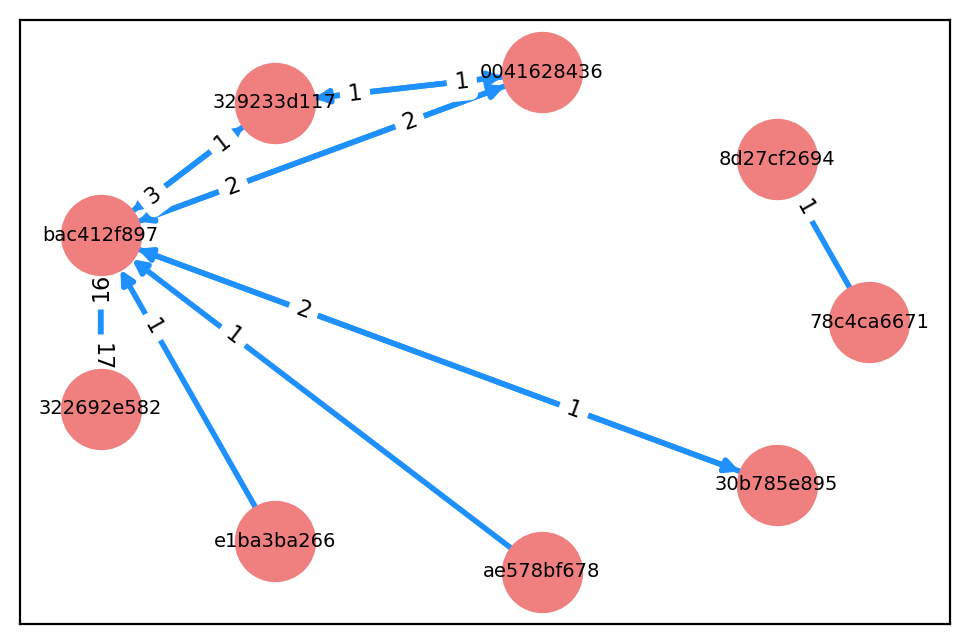

In [11]:
messageDataSet.visualize_connection_network()